In [95]:
from astropy.io import fits
import numpy as np

In [96]:
import matplotlib.pyplot as plt

In [101]:
plaatje = plt.imread("/Users/dijkema/Documents/perseids-aartfaac/daaro/2020-08-13T001126.jpg").mean(axis=2)
plaatje = plaatje / np.max(plaatje) * 255
plaatje = plaatje.astype(np.uint8)
plaatje = plaatje[::-1,::-1] # Rotate 180˚

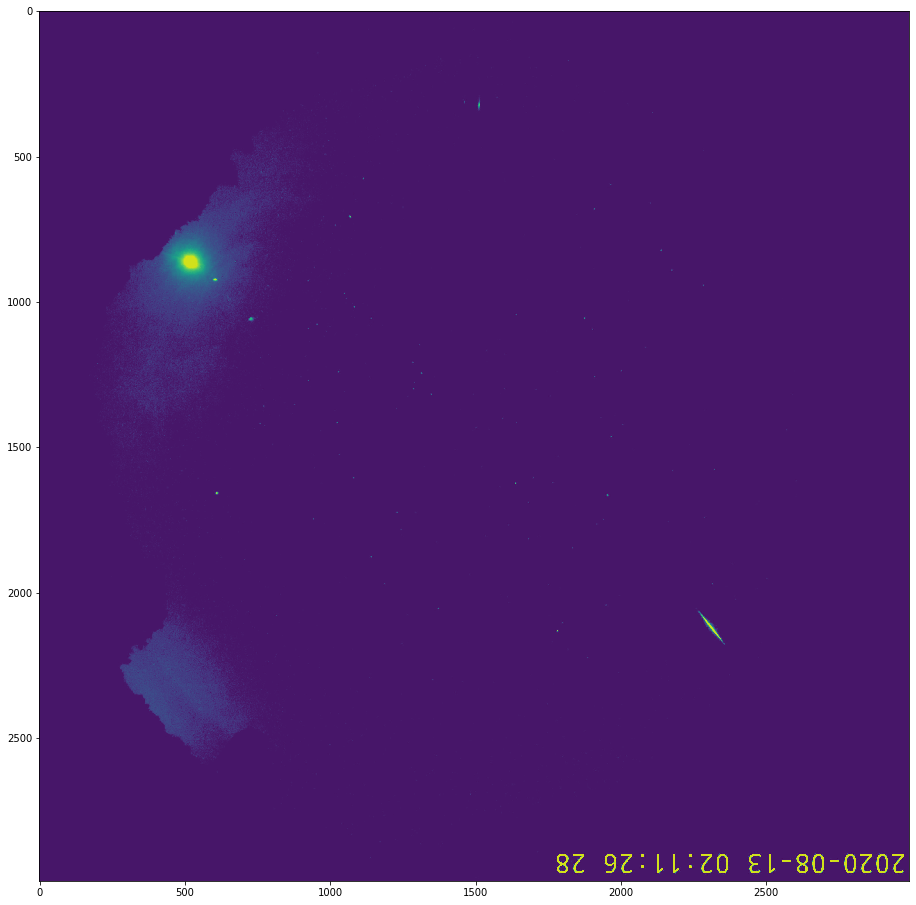

In [103]:
fig, ax = plt.subplots(figsize=(16,16))
ax.imshow(plaatje);

In [104]:
f = fits.open("/Users/dijkema/opt/RMS/RU_fireball_20190427_204636_nosolution/RU0001/FF_RU0001_20190427_210639_501_0363008.fits")

In [105]:
hduplaatje = fits.ImageHDU(plaatje)
hduleeg = fits.PrimaryHDU()

In [106]:
hdul = fits.HDUList([hduleeg, hduplaatje, hduplaatje, hduplaatje, hduplaatje])

In [107]:
f[0].header['FIRST']

363264

In [108]:
for hdu in hdul[1:]:
    hdu.header['XTENSION'] = 'IMAGE'
    hdu.header['PCOUNT'] = 0
    hdu.header['GCOUNT'] = 1

In [109]:
hdul[1].header['EXTNAME'] = 'MAXPIXEL'
hdul[2].header['EXTNAME'] = 'MAXFRAME'
hdul[3].header['EXTNAME'] = 'AVEPIXEL'
hdul[4].header['EXTNAME'] = 'STDPIXEL'

In [110]:
hdul[0].header['NROWS'] = hdul[1].header['NAXIS2']
hdul[0].header['NCOLS'] = hdul[1].header['NAXIS1']
hdul[0].header['NBITS'] = hdul[0].header['BITPIX']
hdul[0].header['NFRAMES'] = 256
hdul[0].header['CAMNO'] = 'RU0001'
hdul[0].header['FPS'] = 25.0
hdul[0].header['FIRST'] = f[0].header['FIRST']

In [111]:
hdul.writeto("/Users/dijkema/opt/RMS/RU_fireball_20190427_204636_nosolution/RU0001/felix.fits")

In [112]:
hdul[1].data.shape

(2992, 2992)

In [113]:
hdul.close()

In [ ]:
f = fits.open("/Users/dijkema/opt/RMS/RU_fireball_20190427_204636_nosolution/RU0001/FF_RU0001_20190427_210639_501_0363008.fits")